# EDA on the Titanic Dataset

In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [24]:
# Load
df = pd.read_csv("https://github.com/datasciencedojo/datasets/raw/master/titanic.csv")
df.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### Analyze Passenger Class vs Survival

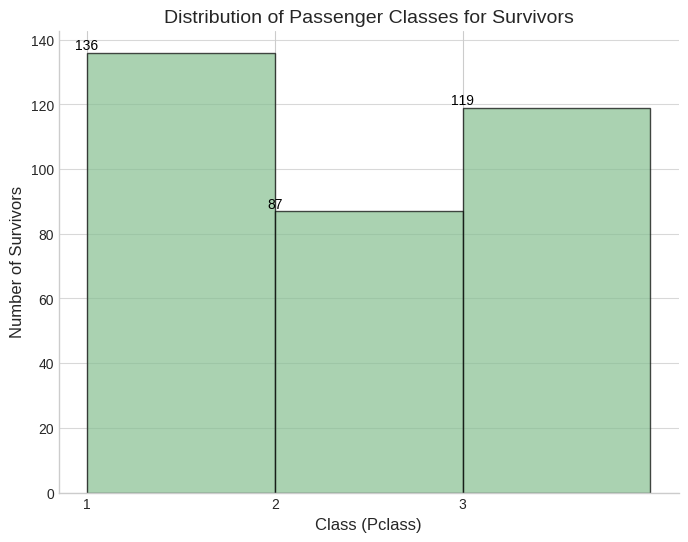

In [32]:
survival_class_series = df[df["Survived"] == 1]["Pclass"]

# Set up the figure and axis
fig, ax = plt.subplots(figsize=(8, 6))
plt.hist(survival_class_series, bins=[1, 2, 3, 4], edgecolor='black', color='#86bf91', alpha=0.7)
plt.xlabel('Class (Pclass)', fontsize=12)
plt.ylabel('Number of Survivors', fontsize=12)
plt.title('Distribution of Passenger Classes for Survivors', fontsize=14)

# Label the plot
for i, count in enumerate(survival_class_series.value_counts().sort_index()):
    plt.text(i+1, count, str(count), ha='center', va='bottom', fontsize=10, color='black')
plt.xticks([1, 2, 3])

plt.grid(axis='y', alpha=0.75)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.show()

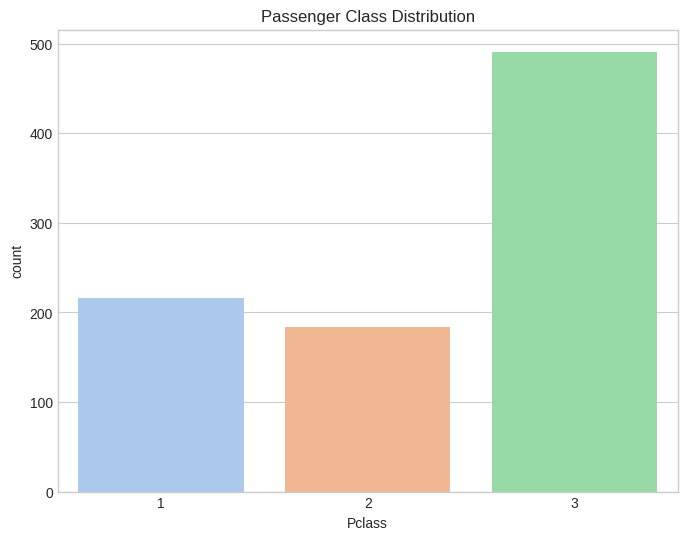

In [36]:
# Plot the Distribution of passengers by class
plt.figure(figsize=(8, 6))
sns.countplot(x='Pclass', data=df, palette='pastel')
plt.title('Passenger Class Distribution')
plt.show()

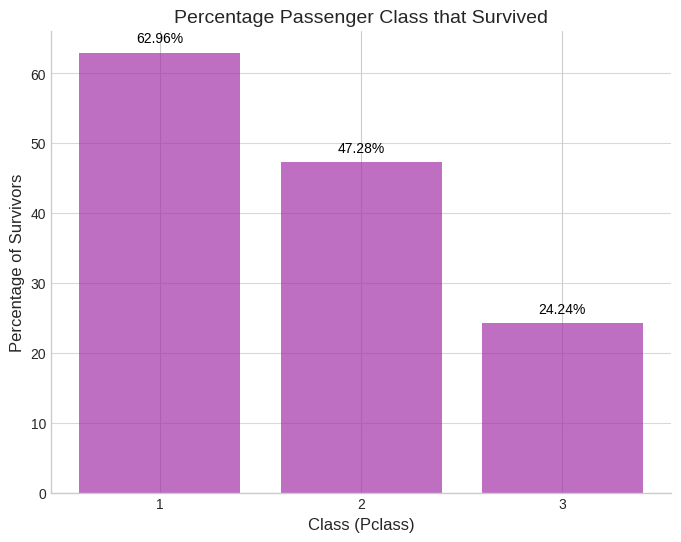

In [33]:
# Find the Survival Rate for Each Class

total_survivors_class1 = len(df[(df["Survived"] == 1) & (df["Pclass"] == 1)])
total_survivors_class2 = len(df[(df["Survived"] == 1) & (df["Pclass"] == 2)])
total_survivors_class3 = len(df[(df["Survived"] == 1) & (df["Pclass"] == 3)])

# Define the total counts for each class
total_num_class1 = len(df[df["Pclass"] == 1])
total_num_class2 = len(df[df["Pclass"] == 2])
total_num_class3 = len(df[df["Pclass"] == 3])

# Calculate the percentages
class1_percentage = (total_survivors_class1 / total_num_class1) * 100
class2_percentage = (total_survivors_class2 / total_num_class2) * 100
class3_percentage = (total_survivors_class3 / total_num_class3) * 100

# Set up the figure and axis
fig, ax = plt.subplots(figsize=(8, 6))

# Create a bar plot for the percentage of survivors in each class
classes = [1, 2, 3]
percentages = [class1_percentage, class2_percentage, class3_percentage]
plt.bar(classes, percentages, color='#a432a8', alpha=0.7)
plt.xlabel('Class (Pclass)', fontsize=12)
plt.ylabel('Percentage of Survivors', fontsize=12)
plt.title('Percentage Passenger Class that Survived', fontsize=14)
plt.xticks(classes)
for i, percent in enumerate(percentages):
    plt.text(classes[i], percent + 1, f'{percent:.2f}%', ha='center', va='bottom', fontsize=10, color='black')
plt.grid(axis='y', alpha=0.75)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

plt.show()


### Explore the Passenger Attributes Beyond Class

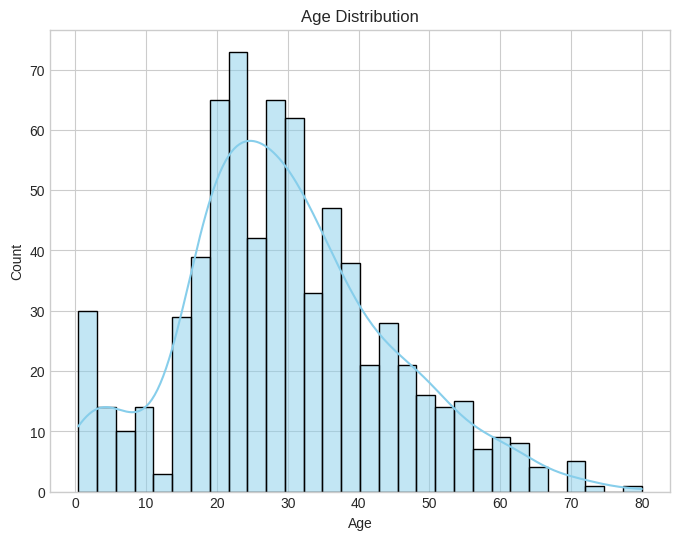

In [37]:
#Plot the Age distribution
plt.figure(figsize=(8, 6))
sns.histplot(df['Age'].dropna(), kde=True, color='skyblue', bins=30)
plt.title('Age Distribution')
plt.show()

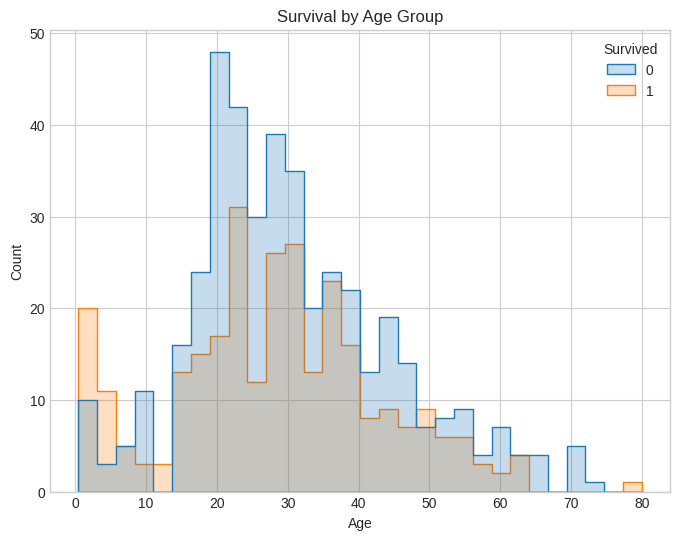

In [38]:
# Plot the Survival by age group
plt.figure(figsize=(8, 6))
sns.histplot(x='Age', hue='Survived', data=df, element='step', common_norm=False, color=['red', 'green'], bins=30)
plt.title('Survival by Age Group')
plt.show()

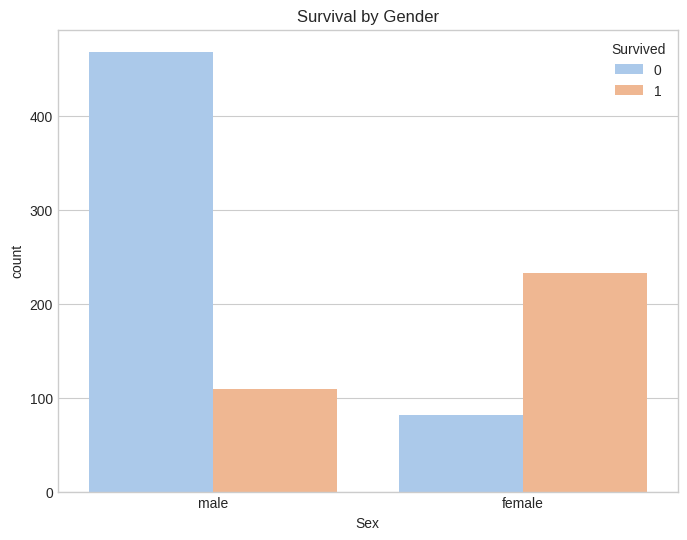

In [39]:
# Plot Survival by gender
plt.figure(figsize=(8, 6))
sns.countplot(x='Sex', hue='Survived', data=df, palette='pastel')
plt.title('Survival by Gender')
plt.show()

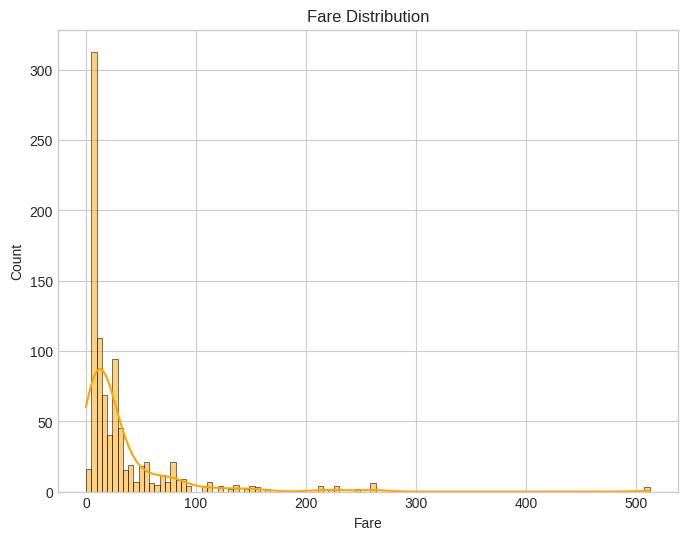

In [40]:
# Plot the Fare distribution
plt.figure(figsize=(8, 6))
sns.histplot(df['Fare'], kde=True, color='orange')
plt.title('Fare Distribution')
plt.show()

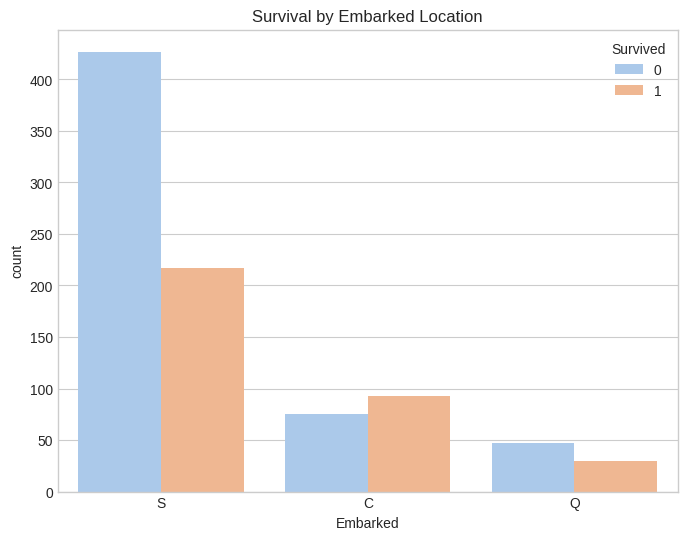

In [41]:
# Plot the Embarked location and survival
plt.figure(figsize=(8, 6))
sns.countplot(x='Embarked', hue='Survived', data=df, palette='pastel')
plt.title('Survival by Embarked Location')
plt.show()

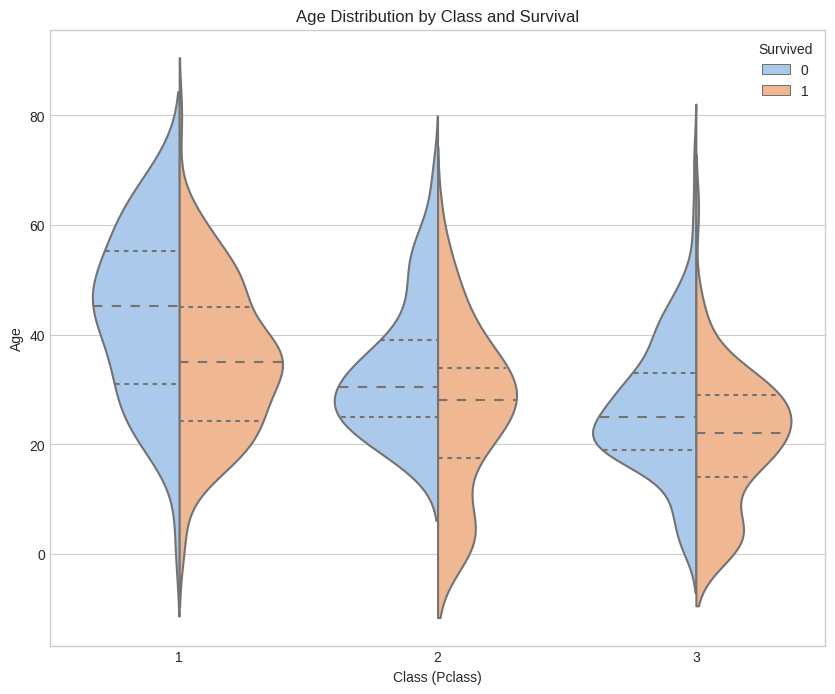

In [43]:
# Compare Age, Class, and Survival all at once
plt.figure(figsize=(10, 8))
sns.violinplot(x='Pclass', y='Age', hue='Survived', data=df, palette='pastel', split=True, inner='quart')
plt.title('Age Distribution by Class and Survival')
plt.xlabel('Class (Pclass)')
plt.ylabel('Age')
plt.show()

# Further Data Manipulation and Analysis

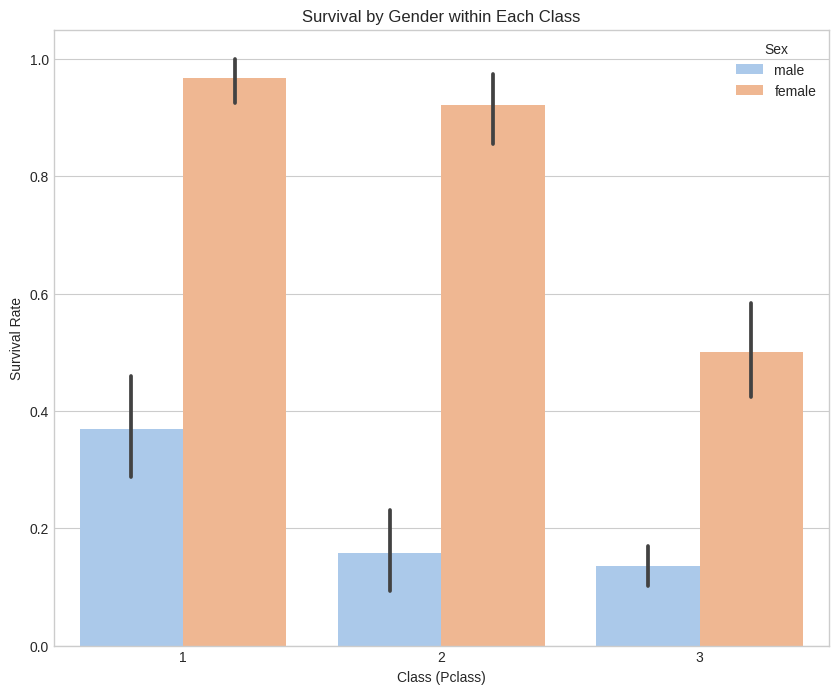

In [45]:
# A grouped bar plot for survival by gender within each class
plt.figure(figsize=(10, 8))
sns.barplot(x='Pclass', y='Survived', hue='Sex', data=df, palette='pastel')
plt.title('Survival by Gender within Each Class')
plt.xlabel('Class (Pclass)')
plt.ylabel('Survival Rate')
plt.show()

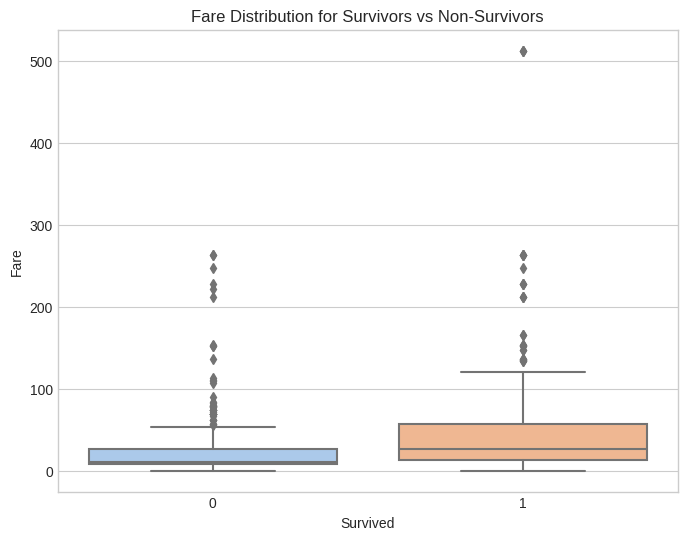

In [46]:
# A boxplot to compare fare distributions for survivors and non-survivors
plt.figure(figsize=(8, 6))
sns.boxplot(x='Survived', y='Fare', data=df, palette='pastel')
plt.title('Fare Distribution for Survivors vs Non-Survivors')
plt.xlabel('Survived')
plt.ylabel('Fare')
plt.show()